In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# read data

X = np.genfromtxt("mnist.data")
Y = np.genfromtxt("mnist.labels")

Label: 5 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


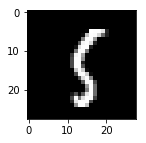

In [3]:
# Choose a random image

index = np.random.randint(55000)
image = X[index].reshape(28, 28)
label = Y[index]
print("Label:", np.argmax(label), label)

# Plot

plt.figure(figsize=(2,2))
plt.imshow(image, cmap="gray")
plt.show()

In [4]:
# split into training & testing sets

split = 50000
trainX, trainY = X[:split], Y[:split]
testX, testY = X[split:], Y[split:]

In [5]:
# import models & layers

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Reshape

In [6]:
# multilayer perceptron

mlp = Sequential()

# input layer 
mlp.add(Dense(15, input_dim=784))
mlp.add(Activation('sigmoid'))

# hidden layer 
mlp.add(Dense(15))
mlp.add(Activation('relu'))

# output layer
mlp.add(Dense(10))
mlp.add(Activation('softmax'))

# Define loss
mlp.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# train mlp

mlphistory = mlp.fit(trainX, trainY, epochs=10, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 4s 79us/step - loss: 1.8642 - acc: 0.4729

In [8]:
# convolutional neural net

cnn = Sequential()

# input layer 
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
cnn.add(Activation('sigmoid'))

# hidden layer 
cnn.add(Conv2D(16, kernel_size=(3, 3), strides=(2, 2)))
cnn.add(Activation('relu'))

# output layer
cnn.add(Flatten())
cnn.add(Dense(10))
cnn.add(Activation('softmax'))

# Define loss
cnn.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# reshape data into 2D

x_train = trainX.reshape(trainX.shape[0], 28, 28, 1)
x_test = testX.reshape(testX.shape[0], 28, 28, 1)

In [ ]:
# train cnn

cnnhistory = cnn.fit(x_train, trainY, epochs=10, verbose=1)

Epoch 1/10
50000/50000 [==============================] - 63s 1ms/step - loss: 1.8629 - acc: 0.3562

In [ ]:
# plot mlp loss funciton

plt.figure()
plt.plot(mlphistory.history["loss"])
plt.plot(cnnhistory.history["loss"])
plt.show()

In [ ]:
# collect predictions for each network

predictions = mlp.predict(testX)
predictionscnn = cnn.predict(x_test)

In [ ]:
index = np.random.randint(5000)
image = testX[index].reshape(28, 28)

print("MLP Label:", np.argmax(predictions[index]))
print("CNN Label:", np.argmax(predictionscnn[index]))

print("MLP result:", predictions[index])
print("CNN result:", predictionscnn[index])

plt.figure(figsize=(2,2))
plt.imshow(image, cmap="gray")
plt.show()

In [ ]:
diff = [i for i in range(1,5000) if np.argmax(predictions[i]) != np.argmax(predictionscnn[i])]
diff

MLP Label: 1
CNN Label: 8


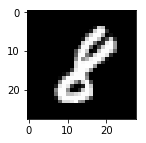

MLP Label: 0
CNN Label: 5


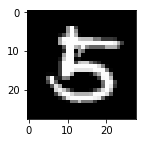

MLP Label: 0
CNN Label: 8


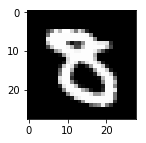

MLP Label: 9
CNN Label: 7


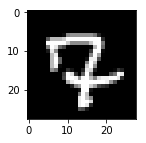

MLP Label: 6
CNN Label: 5


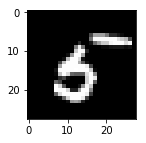

MLP Label: 1
CNN Label: 8


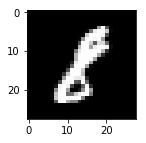

MLP Label: 0
CNN Label: 2


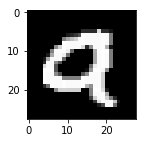

MLP Label: 6
CNN Label: 8


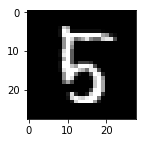

MLP Label: 4
CNN Label: 9


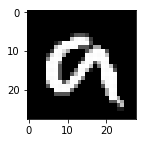

MLP Label: 6
CNN Label: 8


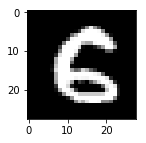

MLP Label: 3
CNN Label: 5


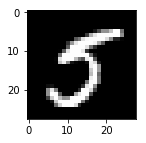

MLP Label: 3
CNN Label: 5


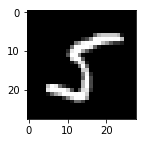

MLP Label: 6
CNN Label: 4


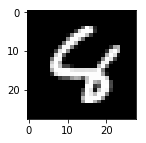

MLP Label: 3
CNN Label: 5


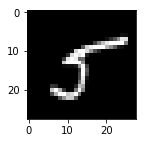

MLP Label: 3
CNN Label: 8


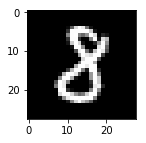

MLP Label: 7
CNN Label: 9


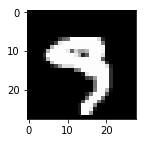

MLP Label: 9
CNN Label: 4


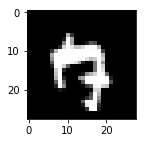

MLP Label: 8
CNN Label: 1


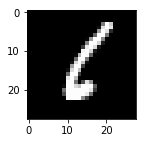

MLP Label: 5
CNN Label: 8


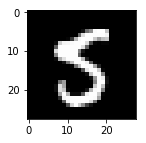

MLP Label: 1
CNN Label: 8


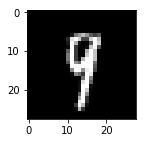

MLP Label: 4
CNN Label: 6


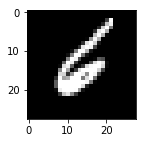

MLP Label: 8
CNN Label: 2


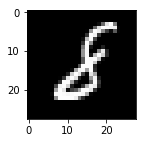

MLP Label: 6
CNN Label: 5


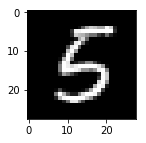

MLP Label: 4
CNN Label: 9


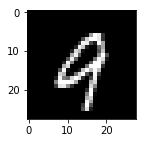

MLP Label: 6
CNN Label: 0


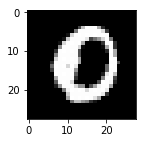

MLP Label: 3
CNN Label: 5


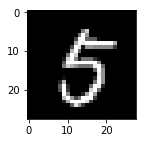

MLP Label: 3
CNN Label: 5


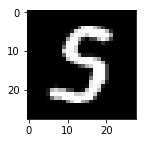

MLP Label: 7
CNN Label: 9


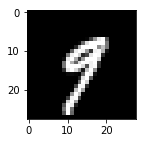

MLP Label: 2
CNN Label: 8


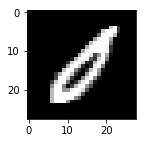

MLP Label: 1
CNN Label: 8


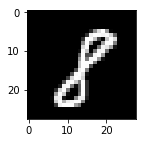

MLP Label: 4
CNN Label: 8


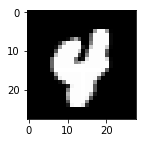

MLP Label: 6
CNN Label: 8


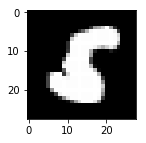

MLP Label: 6
CNN Label: 4


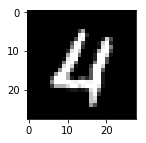

MLP Label: 3
CNN Label: 5


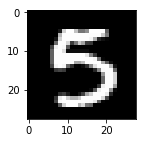

MLP Label: 6
CNN Label: 8


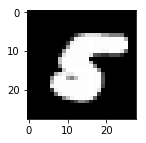

MLP Label: 4
CNN Label: 9


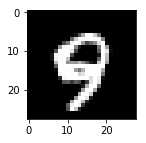

MLP Label: 7
CNN Label: 9


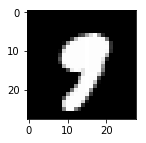

MLP Label: 4
CNN Label: 8


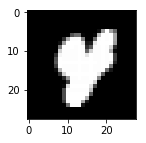

MLP Label: 0
CNN Label: 8


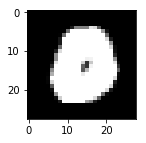

MLP Label: 9
CNN Label: 8


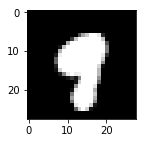

MLP Label: 9
CNN Label: 8


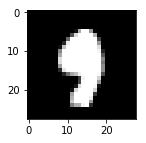

MLP Label: 1
CNN Label: 8


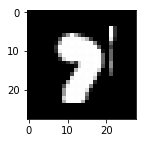

MLP Label: 6
CNN Label: 8


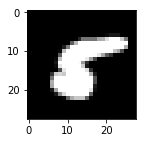

MLP Label: 5
CNN Label: 8


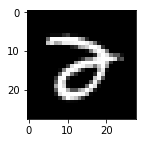

MLP Label: 2
CNN Label: 8


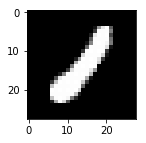

MLP Label: 6
CNN Label: 8


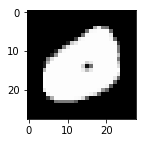

MLP Label: 3
CNN Label: 8


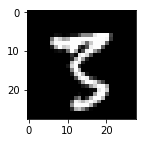

MLP Label: 6
CNN Label: 0


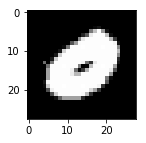

MLP Label: 1
CNN Label: 8


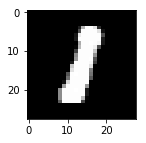

MLP Label: 4
CNN Label: 8


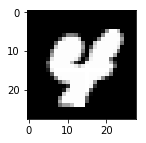

MLP Label: 6
CNN Label: 8


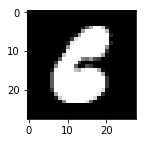

MLP Label: 6
CNN Label: 8


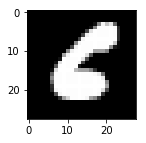

MLP Label: 9
CNN Label: 5


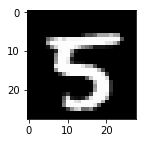

MLP Label: 9
CNN Label: 8


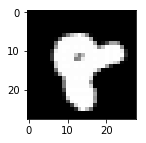

MLP Label: 2
CNN Label: 8


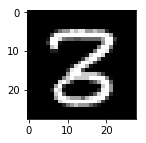

MLP Label: 4
CNN Label: 9


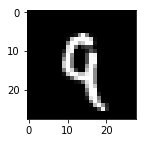

MLP Label: 1
CNN Label: 8


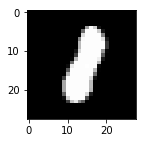

MLP Label: 7
CNN Label: 9


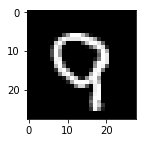

MLP Label: 1
CNN Label: 8


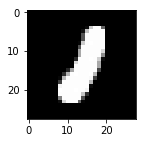

MLP Label: 6
CNN Label: 4


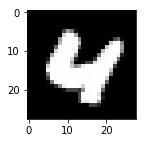

MLP Label: 6
CNN Label: 2


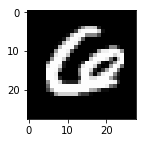

MLP Label: 4
CNN Label: 8


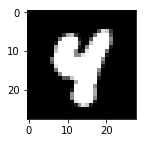

MLP Label: 9
CNN Label: 8


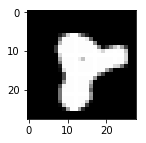

MLP Label: 9
CNN Label: 4


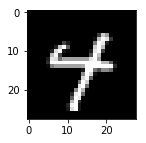

MLP Label: 3
CNN Label: 5


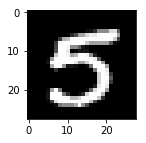

MLP Label: 2
CNN Label: 6


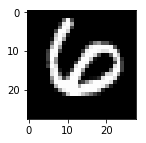

MLP Label: 0
CNN Label: 5


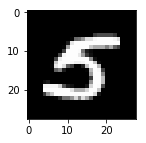

MLP Label: 0
CNN Label: 5


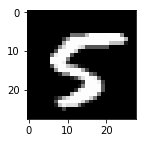

MLP Label: 3
CNN Label: 5


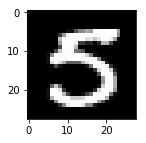

MLP Label: 6
CNN Label: 8


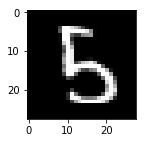

MLP Label: 3
CNN Label: 5


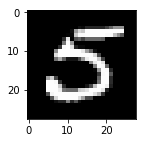

MLP Label: 6
CNN Label: 8


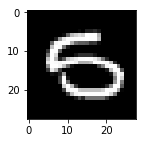

MLP Label: 0
CNN Label: 5


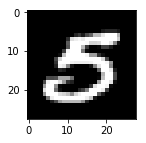

MLP Label: 3
CNN Label: 0


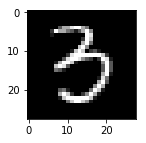

MLP Label: 3
CNN Label: 5


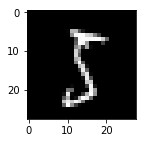

MLP Label: 0
CNN Label: 5


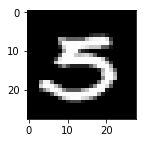

MLP Label: 6
CNN Label: 4


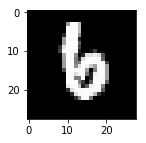

MLP Label: 7
CNN Label: 3


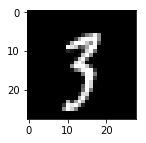

MLP Label: 3
CNN Label: 5


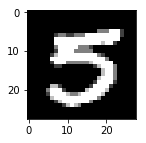

MLP Label: 2
CNN Label: 8


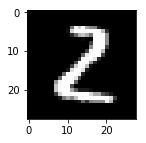

MLP Label: 5
CNN Label: 6


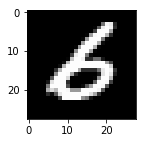

MLP Label: 9
CNN Label: 4


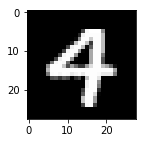

MLP Label: 6
CNN Label: 0


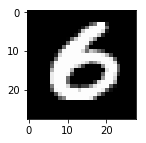

MLP Label: 0
CNN Label: 5


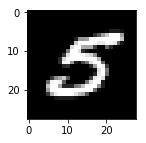

MLP Label: 5
CNN Label: 8


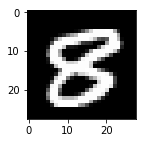

MLP Label: 1
CNN Label: 3


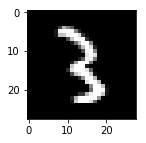

MLP Label: 9
CNN Label: 4


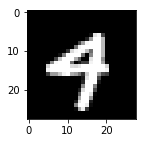

MLP Label: 6
CNN Label: 4


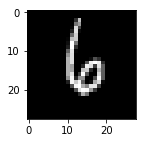

MLP Label: 3
CNN Label: 5


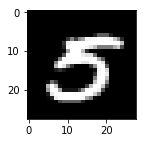

MLP Label: 9
CNN Label: 4


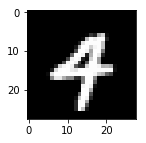

MLP Label: 2
CNN Label: 4


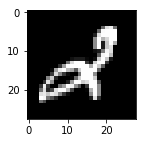

MLP Label: 9
CNN Label: 4


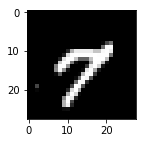

MLP Label: 7
CNN Label: 9


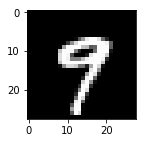

MLP Label: 5
CNN Label: 8


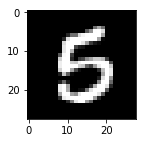

MLP Label: 3
CNN Label: 5


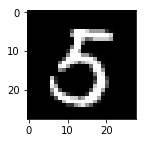

MLP Label: 4
CNN Label: 9


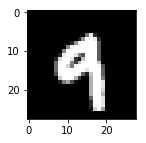

MLP Label: 3
CNN Label: 5


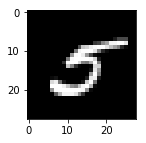

MLP Label: 9
CNN Label: 4


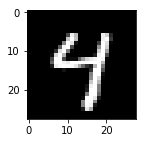

MLP Label: 3
CNN Label: 5


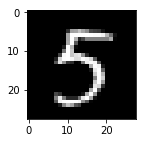

MLP Label: 1
CNN Label: 8


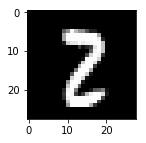

MLP Label: 5
CNN Label: 2


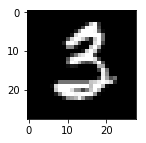

MLP Label: 5
CNN Label: 8


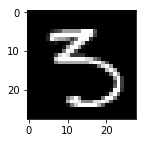

MLP Label: 9
CNN Label: 8


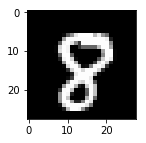

MLP Label: 5
CNN Label: 8


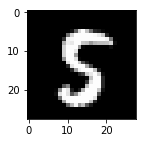

MLP Label: 8
CNN Label: 6


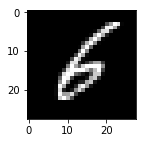

MLP Label: 9
CNN Label: 8


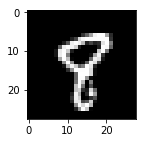

MLP Label: 2
CNN Label: 0


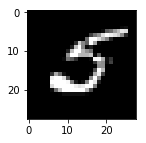

MLP Label: 7
CNN Label: 3


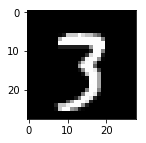

MLP Label: 9
CNN Label: 4


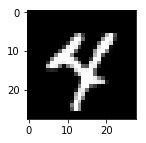

MLP Label: 9
CNN Label: 4


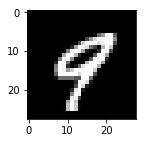

MLP Label: 8
CNN Label: 4


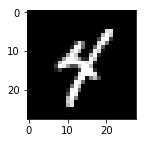

MLP Label: 9
CNN Label: 4


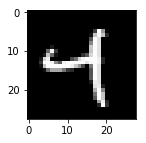

MLP Label: 3
CNN Label: 5


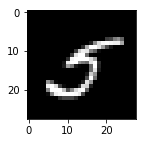

MLP Label: 4
CNN Label: 9


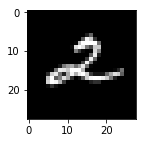

MLP Label: 1
CNN Label: 8


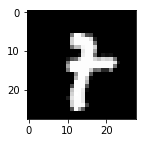

MLP Label: 1
CNN Label: 8


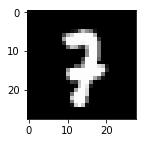

MLP Label: 4
CNN Label: 9


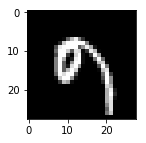

MLP Label: 1
CNN Label: 3


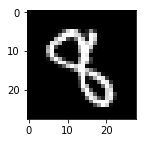

MLP Label: 9
CNN Label: 8


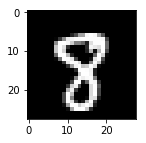

MLP Label: 4
CNN Label: 8


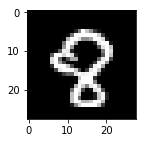

MLP Label: 9
CNN Label: 4


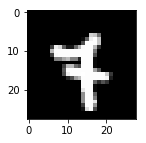

MLP Label: 6
CNN Label: 4


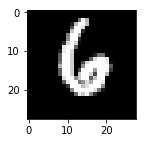

MLP Label: 9
CNN Label: 8


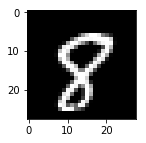

MLP Label: 9
CNN Label: 7


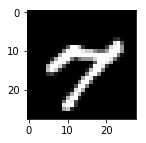

MLP Label: 6
CNN Label: 4


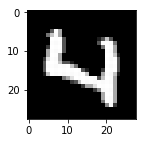

MLP Label: 9
CNN Label: 7


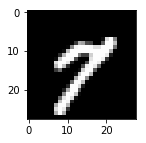

MLP Label: 6
CNN Label: 0


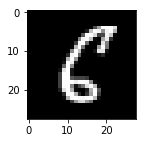

MLP Label: 8
CNN Label: 5


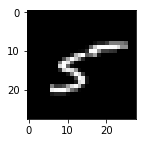

MLP Label: 6
CNN Label: 5


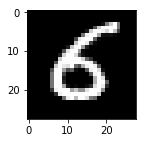

MLP Label: 5
CNN Label: 8


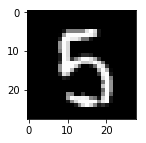

MLP Label: 9
CNN Label: 8


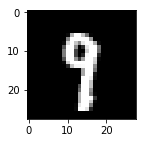

MLP Label: 5
CNN Label: 8


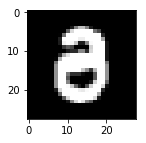

MLP Label: 6
CNN Label: 5


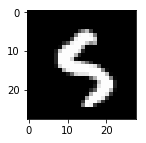

MLP Label: 3
CNN Label: 5


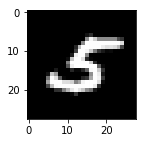

MLP Label: 0
CNN Label: 5


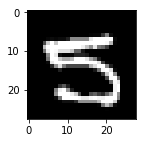

MLP Label: 4
CNN Label: 9


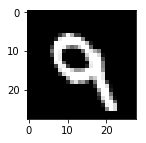

MLP Label: 5
CNN Label: 8


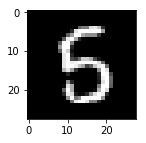

MLP Label: 4
CNN Label: 8


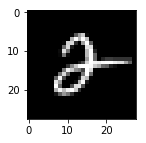

MLP Label: 6
CNN Label: 5


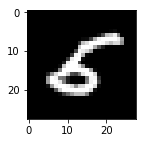

MLP Label: 1
CNN Label: 8


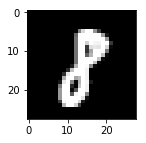

MLP Label: 6
CNN Label: 0


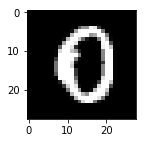

MLP Label: 7
CNN Label: 0


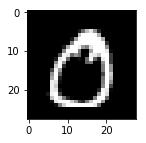

MLP Label: 9
CNN Label: 4


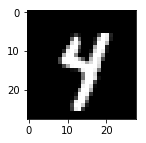

MLP Label: 2
CNN Label: 8


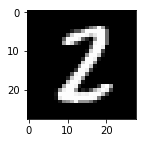

MLP Label: 8
CNN Label: 6


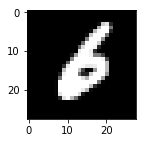

MLP Label: 3
CNN Label: 8


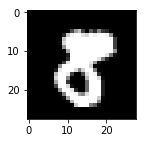

MLP Label: 1
CNN Label: 7


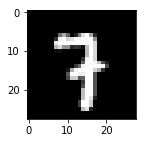

MLP Label: 2
CNN Label: 5


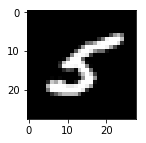

MLP Label: 0
CNN Label: 5


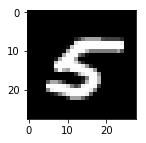

MLP Label: 5
CNN Label: 0


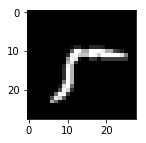

MLP Label: 3
CNN Label: 8


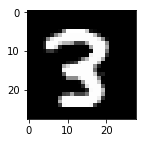

MLP Label: 4
CNN Label: 2


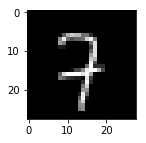

MLP Label: 3
CNN Label: 5


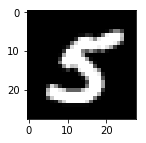

MLP Label: 9
CNN Label: 4


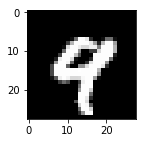

MLP Label: 9
CNN Label: 4


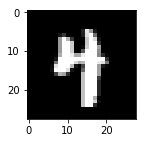

MLP Label: 6
CNN Label: 4


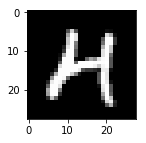

MLP Label: 8
CNN Label: 4


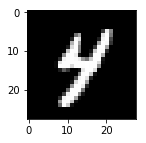

MLP Label: 8
CNN Label: 6


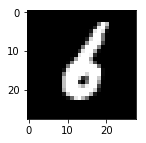

MLP Label: 1
CNN Label: 8


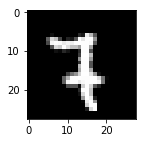

MLP Label: 0
CNN Label: 5


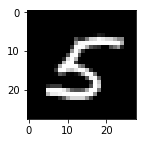

MLP Label: 3
CNN Label: 5


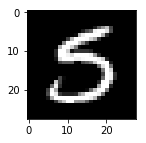

MLP Label: 6
CNN Label: 5


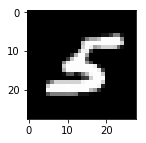

MLP Label: 9
CNN Label: 8


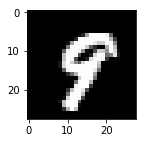

MLP Label: 2
CNN Label: 6


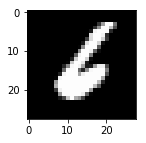

MLP Label: 1
CNN Label: 8


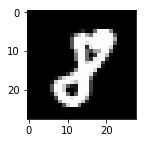

MLP Label: 2
CNN Label: 6


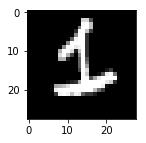

MLP Label: 9
CNN Label: 4


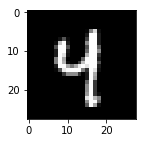

MLP Label: 2
CNN Label: 7


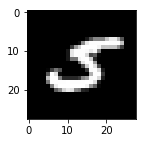

MLP Label: 3
CNN Label: 8


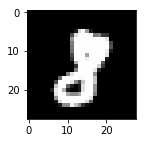

MLP Label: 7
CNN Label: 4


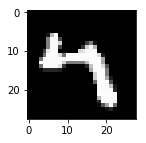

MLP Label: 9
CNN Label: 5


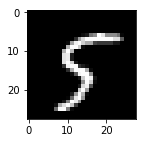

MLP Label: 3
CNN Label: 2


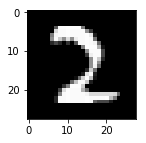

MLP Label: 6
CNN Label: 8


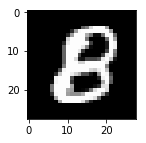

MLP Label: 4
CNN Label: 8


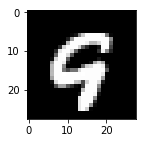

MLP Label: 6
CNN Label: 8


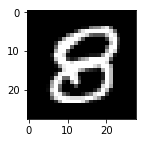

MLP Label: 9
CNN Label: 4


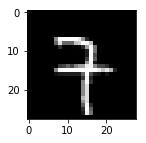

MLP Label: 9
CNN Label: 4


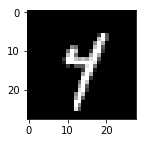

MLP Label: 1
CNN Label: 7


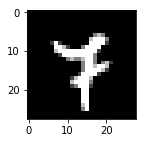

MLP Label: 9
CNN Label: 4


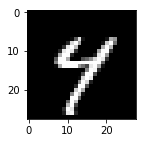

MLP Label: 1
CNN Label: 8


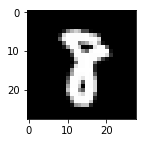

MLP Label: 9
CNN Label: 4


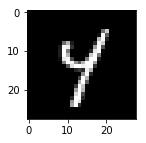

MLP Label: 6
CNN Label: 8


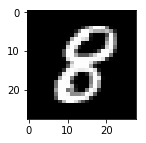

MLP Label: 9
CNN Label: 8


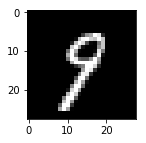

MLP Label: 6
CNN Label: 8


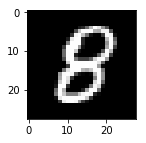

MLP Label: 6
CNN Label: 8


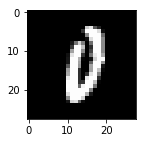

MLP Label: 9
CNN Label: 8


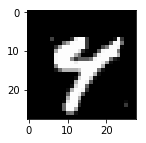

MLP Label: 8
CNN Label: 6


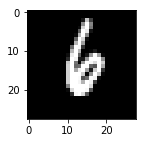

MLP Label: 6
CNN Label: 8


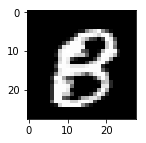

MLP Label: 6
CNN Label: 8


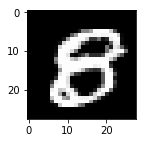

MLP Label: 4
CNN Label: 9


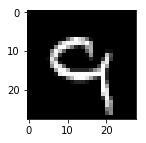

MLP Label: 4
CNN Label: 9


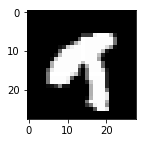

MLP Label: 9
CNN Label: 8


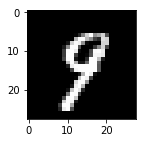

MLP Label: 1
CNN Label: 7


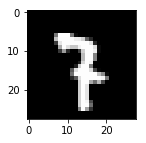

MLP Label: 6
CNN Label: 8


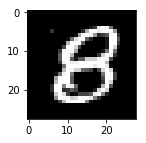

MLP Label: 6
CNN Label: 8


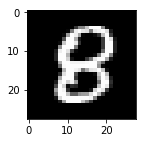

MLP Label: 4
CNN Label: 6


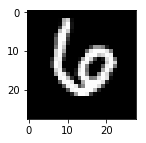

MLP Label: 3
CNN Label: 8


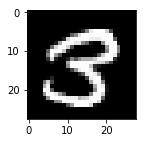

MLP Label: 3
CNN Label: 8


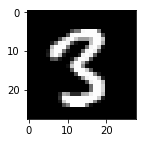

MLP Label: 6
CNN Label: 8


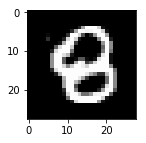

MLP Label: 6
CNN Label: 8


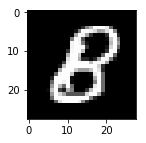

MLP Label: 9
CNN Label: 4


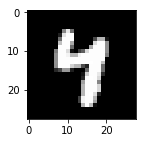

MLP Label: 0
CNN Label: 5


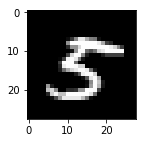

MLP Label: 5
CNN Label: 8


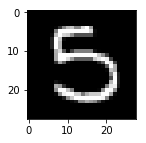

MLP Label: 9
CNN Label: 4


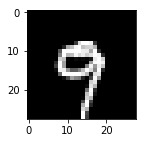

MLP Label: 9
CNN Label: 8


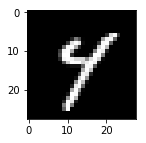

MLP Label: 5
CNN Label: 8


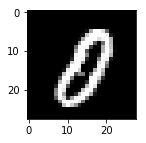

MLP Label: 4
CNN Label: 9


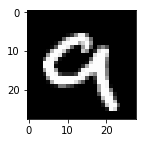

MLP Label: 3
CNN Label: 8


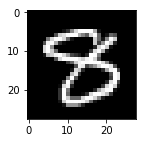

MLP Label: 3
CNN Label: 5


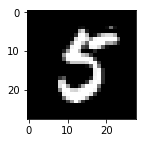

MLP Label: 2
CNN Label: 8


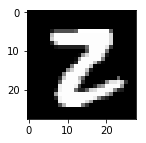

MLP Label: 8
CNN Label: 5


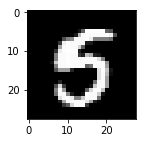

MLP Label: 1
CNN Label: 8


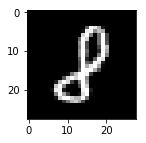

MLP Label: 9
CNN Label: 5


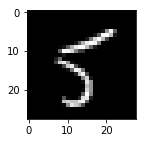

MLP Label: 5
CNN Label: 3


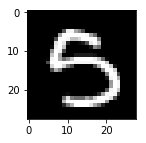

MLP Label: 3
CNN Label: 7


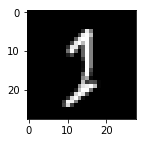

MLP Label: 3
CNN Label: 2


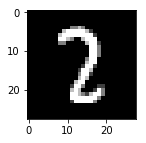

MLP Label: 0
CNN Label: 5


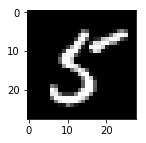

MLP Label: 6
CNN Label: 8


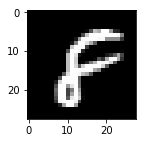

MLP Label: 5
CNN Label: 8


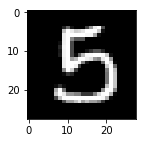

MLP Label: 6
CNN Label: 5


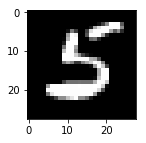

MLP Label: 5
CNN Label: 8


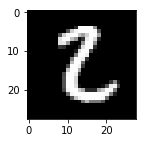

MLP Label: 7
CNN Label: 9


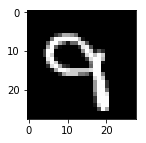

MLP Label: 2
CNN Label: 8


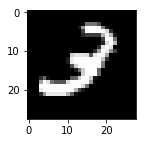

MLP Label: 2
CNN Label: 8


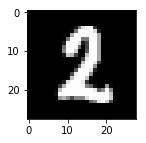

MLP Label: 2
CNN Label: 4


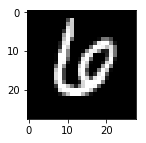

MLP Label: 2
CNN Label: 8


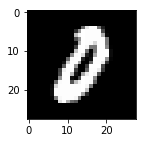

MLP Label: 6
CNN Label: 5


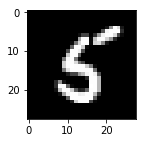

MLP Label: 1
CNN Label: 8


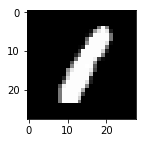

MLP Label: 5
CNN Label: 3


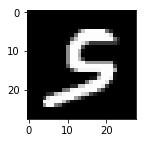

MLP Label: 3
CNN Label: 5


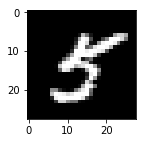

MLP Label: 2
CNN Label: 6


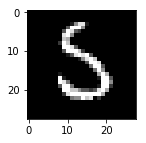

MLP Label: 3
CNN Label: 5


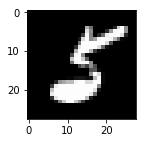

MLP Label: 7
CNN Label: 9


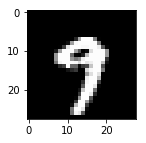

MLP Label: 7
CNN Label: 9


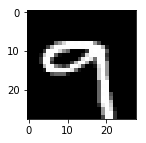

MLP Label: 3
CNN Label: 8


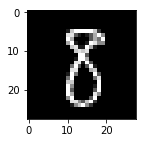

MLP Label: 1
CNN Label: 8


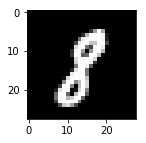

MLP Label: 9
CNN Label: 4


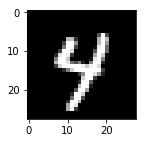

MLP Label: 9
CNN Label: 4


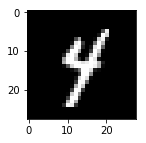

MLP Label: 4
CNN Label: 6


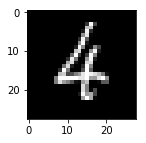

MLP Label: 7
CNN Label: 5


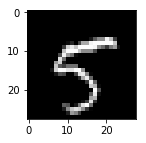

MLP Label: 3
CNN Label: 5


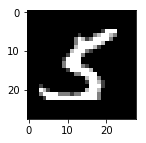

MLP Label: 5
CNN Label: 0


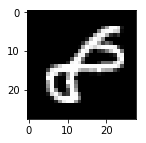

MLP Label: 7
CNN Label: 9


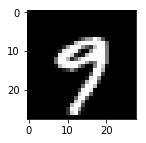

MLP Label: 3
CNN Label: 5


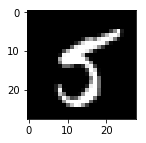

MLP Label: 8
CNN Label: 6


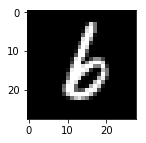

MLP Label: 7
CNN Label: 9


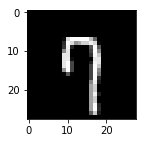

MLP Label: 3
CNN Label: 5


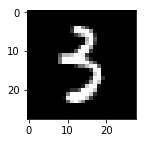

MLP Label: 5
CNN Label: 8


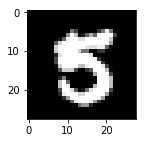

MLP Label: 9
CNN Label: 4


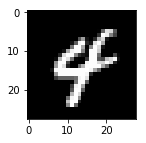

MLP Label: 5
CNN Label: 8


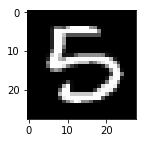

MLP Label: 5
CNN Label: 8


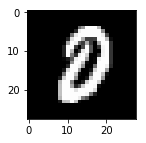

MLP Label: 5
CNN Label: 8


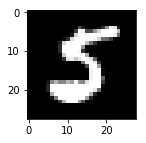

MLP Label: 7
CNN Label: 9


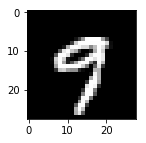

MLP Label: 9
CNN Label: 4


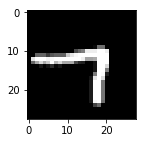

MLP Label: 6
CNN Label: 8


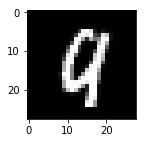

MLP Label: 8
CNN Label: 5


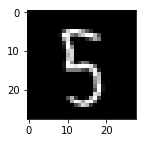

MLP Label: 2
CNN Label: 1


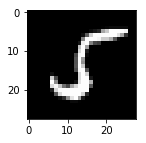

MLP Label: 1
CNN Label: 8


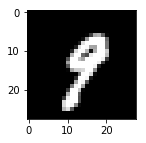

MLP Label: 1
CNN Label: 8


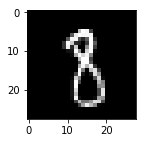

MLP Label: 7
CNN Label: 0


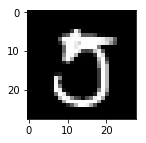

MLP Label: 1
CNN Label: 8


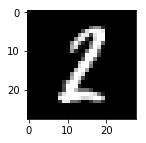

MLP Label: 5
CNN Label: 8


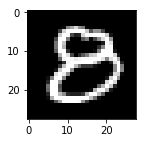

MLP Label: 6
CNN Label: 5


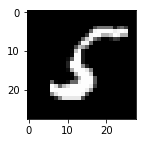

MLP Label: 6
CNN Label: 8


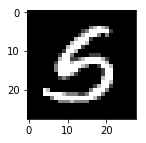

MLP Label: 6
CNN Label: 4


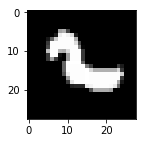

MLP Label: 2
CNN Label: 5


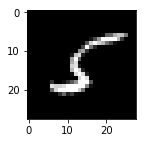

MLP Label: 6
CNN Label: 8


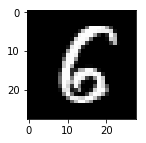

MLP Label: 3
CNN Label: 8


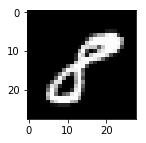

MLP Label: 2
CNN Label: 8


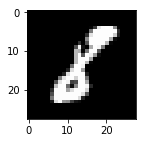

MLP Label: 5
CNN Label: 8


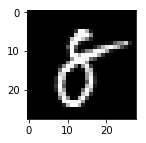

MLP Label: 2
CNN Label: 1


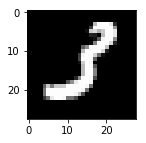

MLP Label: 2
CNN Label: 8


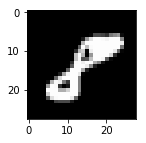

MLP Label: 2
CNN Label: 1


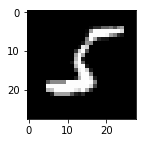

MLP Label: 0
CNN Label: 5


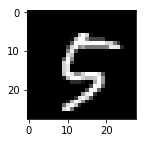

MLP Label: 1
CNN Label: 8


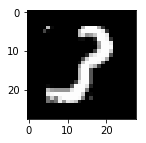

MLP Label: 9
CNN Label: 4


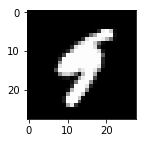

MLP Label: 5
CNN Label: 3


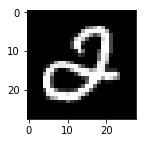

MLP Label: 6
CNN Label: 5


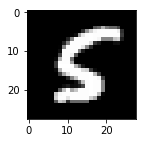

MLP Label: 3
CNN Label: 5


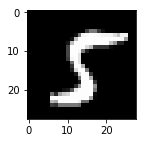

MLP Label: 6
CNN Label: 0


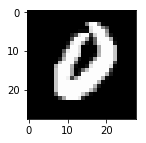

MLP Label: 1
CNN Label: 2


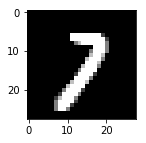

MLP Label: 4
CNN Label: 9


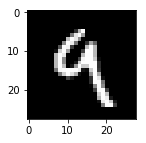

MLP Label: 7
CNN Label: 2


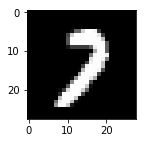

MLP Label: 6
CNN Label: 5


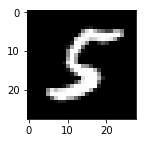

MLP Label: 3
CNN Label: 5


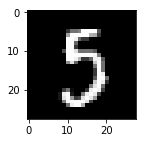

MLP Label: 8
CNN Label: 5


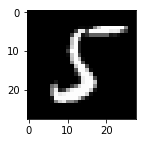

MLP Label: 7
CNN Label: 8


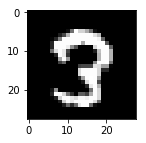

MLP Label: 1
CNN Label: 8


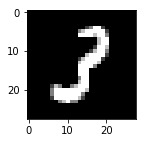

MLP Label: 2
CNN Label: 1


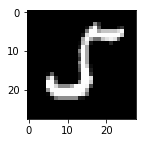

MLP Label: 8
CNN Label: 5


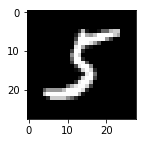

MLP Label: 8
CNN Label: 6


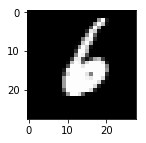

MLP Label: 6
CNN Label: 2


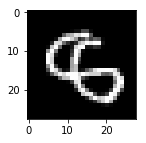

MLP Label: 2
CNN Label: 8


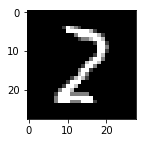

MLP Label: 2
CNN Label: 1


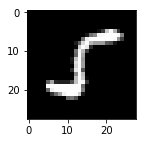

MLP Label: 1
CNN Label: 8


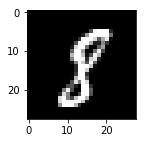

MLP Label: 7
CNN Label: 9


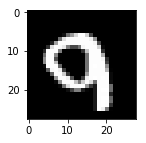

MLP Label: 4
CNN Label: 9


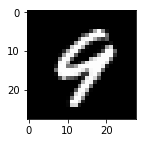

MLP Label: 7
CNN Label: 2


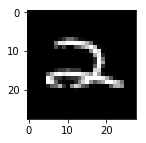

MLP Label: 2
CNN Label: 1


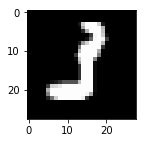

MLP Label: 1
CNN Label: 8


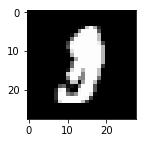

MLP Label: 3
CNN Label: 8


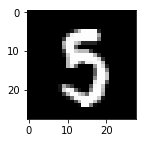

MLP Label: 3
CNN Label: 5


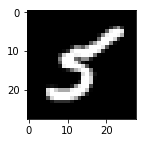

MLP Label: 4
CNN Label: 8


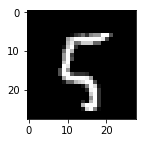

MLP Label: 3
CNN Label: 8


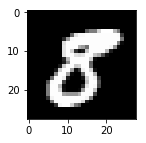

MLP Label: 3
CNN Label: 8


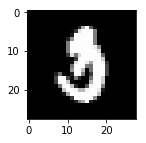

MLP Label: 3
CNN Label: 5


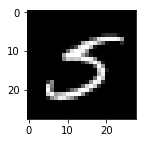

MLP Label: 1
CNN Label: 3


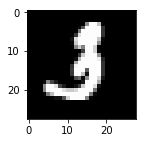

MLP Label: 9
CNN Label: 4


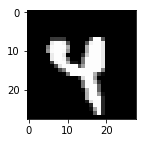

MLP Label: 8
CNN Label: 6


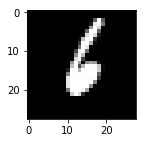

MLP Label: 4
CNN Label: 9


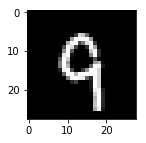

MLP Label: 9
CNN Label: 4


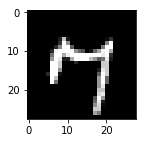

MLP Label: 9
CNN Label: 4


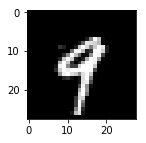

MLP Label: 3
CNN Label: 2


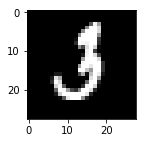

MLP Label: 6
CNN Label: 5


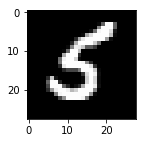

MLP Label: 7
CNN Label: 8


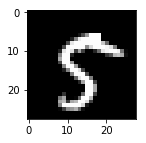

MLP Label: 2
CNN Label: 8


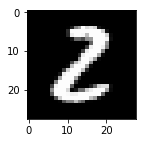

MLP Label: 8
CNN Label: 5


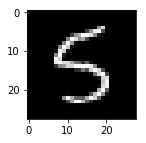

MLP Label: 6
CNN Label: 2


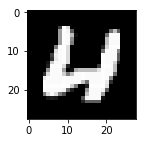

MLP Label: 3
CNN Label: 8


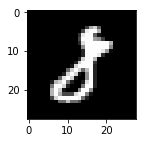

MLP Label: 1
CNN Label: 3


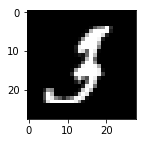

MLP Label: 7
CNN Label: 4


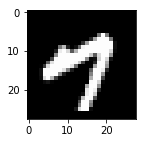

MLP Label: 1
CNN Label: 8


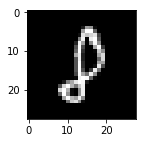

MLP Label: 1
CNN Label: 8


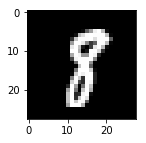

MLP Label: 7
CNN Label: 9


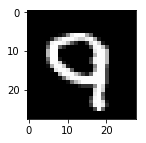

MLP Label: 9
CNN Label: 7


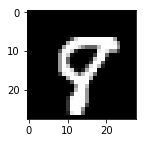

MLP Label: 9
CNN Label: 4


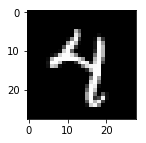

MLP Label: 9
CNN Label: 4


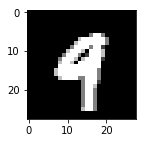

MLP Label: 6
CNN Label: 8


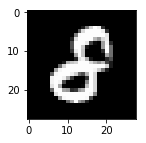

MLP Label: 4
CNN Label: 9


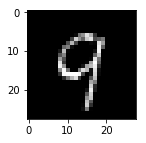

MLP Label: 1
CNN Label: 8


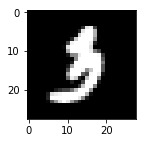

MLP Label: 6
CNN Label: 8


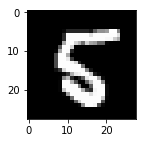

MLP Label: 3
CNN Label: 8


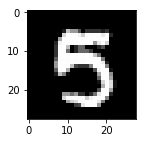

MLP Label: 9
CNN Label: 8


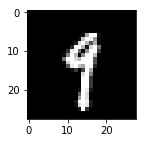

MLP Label: 8
CNN Label: 6


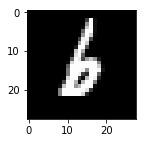

MLP Label: 1
CNN Label: 7


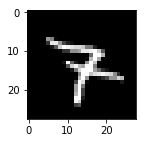

MLP Label: 1
CNN Label: 8


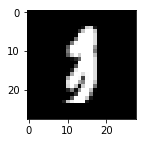

MLP Label: 1
CNN Label: 8


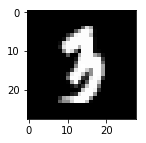

MLP Label: 8
CNN Label: 3


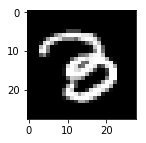

MLP Label: 2
CNN Label: 8


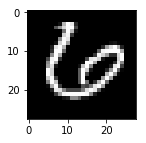

MLP Label: 2
CNN Label: 8


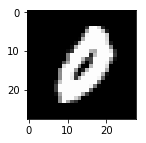

MLP Label: 3
CNN Label: 8


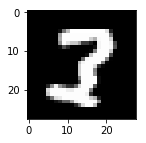

MLP Label: 2
CNN Label: 5


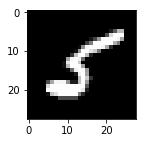

MLP Label: 9
CNN Label: 8


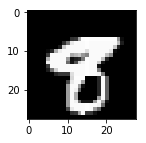

MLP Label: 7
CNN Label: 9


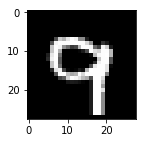

MLP Label: 9
CNN Label: 8


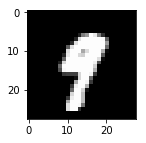

MLP Label: 1
CNN Label: 8


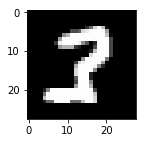

MLP Label: 2
CNN Label: 5


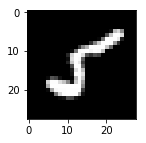

MLP Label: 2
CNN Label: 8


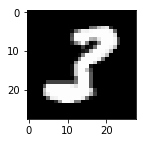

MLP Label: 1
CNN Label: 3


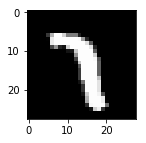

MLP Label: 6
CNN Label: 5


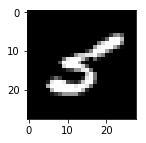

MLP Label: 5
CNN Label: 8


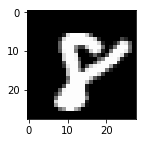

MLP Label: 9
CNN Label: 4


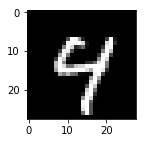

MLP Label: 4
CNN Label: 9


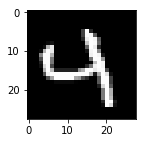

MLP Label: 3
CNN Label: 5


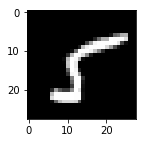

MLP Label: 3
CNN Label: 5


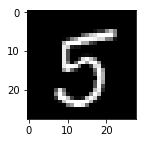

MLP Label: 9
CNN Label: 8


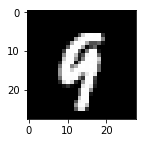

MLP Label: 4
CNN Label: 8


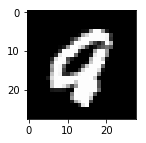

MLP Label: 4
CNN Label: 8


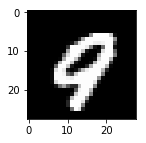

MLP Label: 9
CNN Label: 4


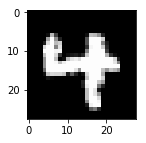

MLP Label: 5
CNN Label: 8


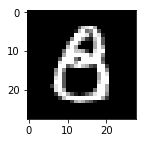

MLP Label: 7
CNN Label: 9


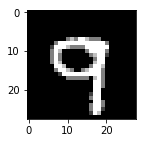

MLP Label: 8
CNN Label: 4


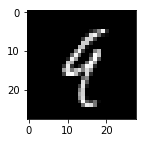

MLP Label: 8
CNN Label: 5


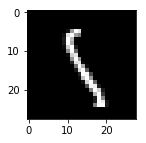

MLP Label: 7
CNN Label: 3


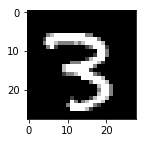

MLP Label: 3
CNN Label: 5


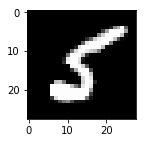

MLP Label: 1
CNN Label: 8


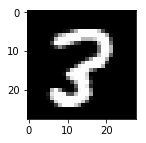

MLP Label: 3
CNN Label: 5


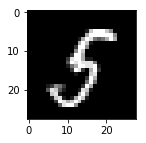

MLP Label: 9
CNN Label: 4


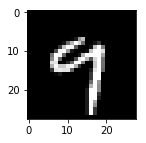

MLP Label: 2
CNN Label: 5


KeyboardInterrupt: 

In [59]:
for i in diff:
    print("MLP Label:", np.argmax(predictions[i]))
    print("CNN Label:", np.argmax(predictionscnn[i]))
    image = testX[i].reshape(28, 28)
    plt.figure(figsize=(2,2))
    plt.imshow(image, cmap="gray")
    plt.show()
